<a href="https://colab.research.google.com/github/Mbapat2211/Memes-vs-Notes/blob/master/Memes-v-Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Stage_2_mod.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import math
import cv2
from google.colab.patches import cv2_imshow
from sklearn.utils import shuffle


%matplotlib inline

In [3]:
memes_dir = os.path.join('Stage_2/Memes')
notes_dir = os.path.join('Stage_2/Notes')


train_memes_dir = os.path.join(memes_dir, 'train_memes')
train_notes_dir = os.path.join(notes_dir, 'train_notes')
test_memes_dir = os.path.join(memes_dir, 'test_memes')
test_notes_dir = os.path.join(notes_dir, 'test_notes')

In [4]:
train_x_list = []
label= []
label_names = ["Memes" , "Notes"]

for file in os.listdir(train_memes_dir):
  image = cv2.imread(train_memes_dir + '/' + file)
  image = cv2.resize(image, (50,50))
  train_x_list.append(image)
  label.append(0)

for file in os.listdir(train_notes_dir):
  image = cv2.imread(train_notes_dir + '/' + file)
  image = cv2.resize(image, (50,50))
  train_x_list.append(image)
  label.append(1)

train_x_list = np.array(train_x_list)
label = np.array(label)
mix = list(zip(train_x_list, label))
mix = shuffle(mix)
train_x_list, label = list(zip(*mix))
train_x_list = np.array(train_x_list)
label = np.array(label)
label = label.reshape(1, label.shape[0])

In [5]:
test_x_list = []
label_test= []

for file in os.listdir(test_memes_dir):
  image = cv2.imread(test_memes_dir + '/' + file)
  image = cv2.resize(image, (50,50))
  test_x_list.append(image)
  label_test.append(0)

for file in os.listdir(test_notes_dir):
  image = cv2.imread(test_notes_dir + '/' + file)
  image = cv2.resize(image, (50,50))
  test_x_list.append(image)
  label_test.append(1)

test_x_list = np.array(test_x_list)
label_test = np.array(label_test)
mix_test = list(zip(test_x_list, label_test))
mix_test = shuffle(mix_test)
test_x_list, label_test = list(zip(*mix_test))
test_x_list = np.array(test_x_list)
label_test = np.array(label_test)
label_test = label_test.reshape(1, label_test.shape[0])

y = [1], it's a Notes picture.


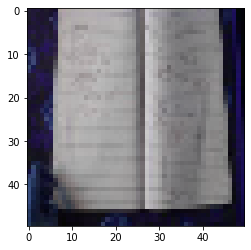

In [6]:
index = 655
plt.imshow(train_x_list[index])
print ("y = " + str(label[:, index]) + ", it's a " + label_names[label[0, index]] + " picture.")

In [7]:
train_x = train_x_list.reshape(train_x_list.shape[0], -1).T
train_x = train_x/255

test_x = test_x_list.reshape(test_x_list.shape[0], -1).T
test_x = test_x/255


In [8]:
print('total training memes images:', len(os.listdir(train_memes_dir)))
print('total training notes images:', len(os.listdir(train_notes_dir)))
print('total test memes images:', len(os.listdir(test_memes_dir)))
print('total test notes images:', len(os.listdir(test_notes_dir)))

total training memes images: 760
total training notes images: 760
total test memes images: 40
total test notes images: 40


In [9]:
def sigmoid(x):
  s=1/(1+np.exp(-x))
  return s

In [10]:
def relu(x):
  r = np.maximum(0,x)
  return r

In [11]:
def back_relu(x):
  if x.any() != 0:
    b = x
  else:
    b = 0
  return b

In [12]:
def initialise(dim):
    
  np.random.seed(3)

  W1 = np.random.randn(dim[1],dim[0]) * 0.0001
  b1 = np.zeros((dim[1],1))
  W2 = np.random.randn(dim[2],dim[1]) * 0.0001
  b2 = np.zeros((dim[2],1))
  W3 = np.random.randn(dim[3],dim[2]) * 0.0001
  b3 = np.zeros((dim[3],1))
  W4 = np.random.randn(dim[4],dim[3]) * 0.0001
  b4 = np.zeros((dim[4],1)) 
  W5 = np.random.randn(dim[5],dim[4]) * 0.0001
  b5 = np.zeros((dim[5],1))

  parameters = {"W1": W1, "b1": b1,
               "W2": W2, "b2": b2,
               "W3": W3, "b3": b3,
               "W4": W4, "b4": b4,
               "W5": W5, "b5": b5}

  return parameters

In [13]:
def forward_prop(X, Y, train_set, parameters):
  
  m = X.shape[1]
  cost = 0

  W1 = parameters["W" + str(1)]
  b1 = parameters["b" + str(1)]
  W2 = parameters["W" + str(2)]
  b2 = parameters["b" + str(2)]
  W3 = parameters["W" + str(3)]
  b3 = parameters["b" + str(3)]
  W4 = parameters["W" + str(4)]
  b4 = parameters["b" + str(4)]  
  W5 = parameters["W" + str(5)]
  b5 = parameters["b" + str(5)]

  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = relu(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = relu(Z3)
  Z4 = np.dot(W4, A3) + b4
  A4 = relu(Z4)
  Z5 = np.dot(W5, A4) + b5
  A5 = sigmoid(Z5)

  if(train_set == True):
    cost = (-1/m) * np.sum(Y*np.log(A5) + (1-Y)*np.log(1-A5))
    
  cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4, Z5, A5, W5, b5)
  return cost, cache

In [14]:
def backward_prop(X, Y, cache):
  m = X.shape[1]
  
  (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4, Z5, A5, W5, b5) = cache

  dZ5 = A5 - Y
  dW5 = 1./m * np.dot(dZ5, A4.T)
  db5 = 1./m * np.sum(dZ5, axis=1, keepdims = True)

  dA4 = np.dot(W5.T, dZ5)
  dZ4 = np.multiply(dA4, back_relu(Z4))
  dW4 = 1./m * np.dot(dZ4, A3.T)
  db4 = 1./m * np.sum(dZ4, axis=1, keepdims = True)

  dA3 = np.dot(W4.T, dZ4)
  dZ3 = np.multiply(dA3, back_relu(Z3))
  dW3 = 1./m * np.dot(dZ3, A2.T)
  db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
  dA2 = np.dot(W3.T, dZ3)
  dZ2 = np.multiply(dA2, back_relu(Z2))
  dW2 = 1./m * np.dot(dZ2, A1.T)
  db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
   
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, back_relu(Z1))
  dW1 = 1./m * np.dot(dZ1, X.T)
  db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
  gradients = {"dZ5": dZ5, "dW5": dW5, "db5": db5,
              "dZ4": dZ4, "dW4": dW4, "db4": db4,
              "dZ3": dZ3, "dW3": dW3, "db3": db3,
              "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
              "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
  return gradients, A5

In [15]:
def update_values(dims, X, Y, parameters, train_set = False, num_iterations = 5, learning_rate = 0.05):

  costs = []
  for i in range(num_iterations):
    cost, cache = forward_prop(X, Y, train_set, parameters)
    gradients, AL = backward_prop(X, Y, cache)
    for l in range(5):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - gradients["dW" + str(l+1)] * learning_rate
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - gradients["db" + str(l+1)] * learning_rate 
    if train_set == True:
      costs.append(cost)
      print ("Cost after iteration %i: %f" %(i, cost))
  
  return AL, costs, learning_rate, num_iterations, parameters

In [18]:
def model(dims, X_train, X_test, Y_train, Y_test):
  
  parameters = initialise(dims)
  AL, costs, learning_rate, num_iterations, parameters = update_values(dims, X_train, Y_train, parameters, train_set = True)
  AL_test, costs_test, learning_rate, num_iterations, parameters = update_values(dims, X_test, Y_test, parameters)
  
  Y_prediction_train = np.zeros((1,AL.shape[1]))
  Y_prediction_test = np.zeros((1,AL_test.shape[1]))
  for i in range(AL.shape[1]):
    Y_prediction_train[0,i] = (AL[0,i] >= 0.5)
  for i in range(AL_test.shape[1]):
    Y_prediction_test[0,i] = (AL_test[0,i] >= 0.5)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
  d = {"costs": costs, 
      "Y_prediction_train" : Y_prediction_train,
      "Y_prediction_test" : Y_prediction_test, 
      "learning_rate" : learning_rate,
      "num_iterations": num_iterations}

  return d

In [19]:
dims = [7500, 8000, 6500, 5000, 1500, 1]
d= model(dims, train_x, test_x, label, label_test)

Cost after iteration 0: 0.693147
Cost after iteration 1: 0.693147
Cost after iteration 2: 0.693147
Cost after iteration 3: 0.693147
Cost after iteration 4: 0.693147
train accuracy: 46.118421052631575 %
test accuracy: 50.0 %


y = 0, you predicted that it is a "Memes" picture.


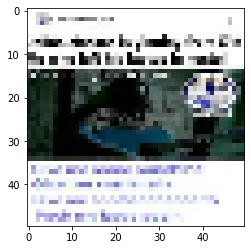

In [ ]:
index = 28

plt.imshow(test_x[:,index].reshape((train_x_list.shape[1], train_x_list.shape[1], 3)))
print ("y = " + str(label_test[0,index]) + ", you predicted that it is a \"" + label_names[int(d["Y_prediction_test"][0][index])] +  "\" picture.")

y = 0, you predicted that it is a "Memes" picture.


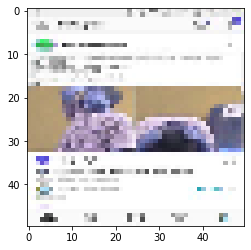

In [ ]:
index = 55
plt.imshow(train_x[:,index].reshape((train_x_list.shape[1], train_x_list.shape[1], 3)))
print ("y = " + str(label[0,index]) + ", you predicted that it is a \"" + label_names[int(d["Y_prediction_train"][0][index])] +  "\" picture.")